# Python Crash Course

### Mathematical Operators

In [ ]:
a = 4
b = 3
a*b

In [ ]:
c=[1,2,3]
2*c

In [ ]:
import numpy
c=numpy.array([1,2,3])
2*c

In [ ]:
numpy.absolute(-10)

In [ ]:
z=numpy.zeros((2,3))

In [ ]:
z[0,-2]=10

In [ ]:
z[0,-1] = 1

In [ ]:
numpy.where(z==1)

In [ ]:
z[numpy.where(z==1)]=10

In [ ]:
z[numpy.where(z==10)]=numpy.nan

In [ ]:
numpy.isnan(z)

In [ ]:
numpy.shape(z)

In [ ]:
z[0,:]

In [ ]:
a=numpy.arange(0,11,0.5)
a

### Be very careful!!

In [ ]:
c = numpy.array([0,0,0])
x = c.copy()
x[0] = 10
c

In [ ]:
x = c.copy()
x[0]=15
c

In [ ]:
import numpy as np
np.array

### More Mathematical Functions

In [ ]:
a

In [ ]:
print(a)

In [ ]:
max(a)

In [ ]:
np.mean(a)

In [ ]:
np.std(a)

In [ ]:
a[0]=np.nan

In [ ]:
np.mean(a)

In [ ]:
np.nanmean(a)

In [ ]:
import math as mt
a=4
d = mt.sqrt(a)
d

In [ ]:
mt.sin(mt.radians(90))

### Dealing with NetCDFs

In [ ]:
import xarray as xr
a=20
path       = '/work/uo1075/u241292/data/ERAI/atmo/'
file       = 'monavg_all_%dN_names.nc' %a
data       = xr.open_dataset('%s%s' %(path,file))
data.info()

In [ ]:
myvar = data['2t']
lat   = data['lat']
lon   = data['lon']
time  = data['time']


In [ ]:
np.shape(myvar.values)

### Plot Time Series

In [99]:
import numpy as np
import matplotlib.pyplot as plt

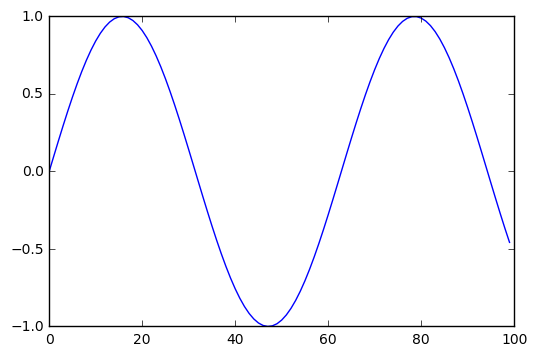

In [102]:
x=np.arange(0,10,0.1)
y=np.sin(x)
plt.plot(y)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(5,4))
ts=np.arange(0,100,1)
plt.axhline(60,color='r',ls='--',label='yes')
plt.axvline(60,color='g',lw=3,label='no')
plt.plot(ts,label='maybe')
plt.legend(loc='upper right')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('title')
fig.savefig('/home/zmaw/u241292/test.eps')
plt.show()

In [ ]:
plt.bar(ts,ts*1.5,facecolor='r',alpha=0.2)
plt.bar(ts+0.3,ts*1.1,facecolor='b',alpha=0.2)
plt.bar(ts+0.1,-ts*0.5,facecolor='c',alpha=0.2)
plt.xlim(0,15)
plt.ylim(-10,20)
plt.show()

# More plotting

https://matplotlib.org/2.1.1/gallery/index.html

In [ ]:
plt.barh(ts,ts*1.5,facecolor='r',alpha=0.2)
plt.barh(ts+0.3,ts*1.1,facecolor='b',alpha=0.2)
plt.barh(ts+0.1,-ts*0.5,facecolor='c',alpha=0.2)
plt.ylim(0,15)
plt.xlim(-10,20)
plt.show()

In [ ]:
mydata=myvar.values
np.shape(mydata)

In [ ]:
plt.plot(mydata[:,90,0])
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))

fig.add_subplot(2,2,1)
plt.plot(mydata[:,90,0],'b')
plt.plot(mydata[:,90,100],'r')

fig.add_subplot(2,2,2)
plt.plot(mydata[:,90,10],'g')
plt.plot(mydata[:,90,100],'r')

fig.add_subplot(2,2,3)
plt.plot(mydata[:,90,10],'g')
plt.plot(mydata[:,90,100],'r')

fig.add_subplot(2,2,4)
plt.plot(mydata[:,90,0],'b')
plt.plot(mydata[:,90,100],'r')

plt.tight_layout()

fig.savefig('/home/zmaw/u241292/fig.png', dpi=300)
fig.savefig('/home/zmaw/u241292/fig.pdf')

plt.show()

In [ ]:
plt.plot(mydata[:,90,0],mydata[:,90,100],'or')
plt.show()

In [ ]:
from scipy import stats


In [ ]:
x=mydata[:,90,0]
y=mydata[:,90,100]
slope, intercept, r_value, a, a = stats.linregress(x, y)

In [ ]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend(loc='upper left', frameon=False)
plt.text(300,290,'corr = %.2f' %r_value)
plt.text(300,298,r'$y = %.2fx +%.2f$' %(slope, intercept), color='r', fontsize=14)
plt.text(320,310,'text outside the plot')
plt.show()

### Make your own functions

In [ ]:
bigtrend=mydata[:,90,0]+np.arange(0,len(mydata[:,90,0]),1)

plt.plot(bigtrend)
plt.show()

In [ ]:
def detrend(y):
    from scipy import stats
    slope, intercept, _, _, _ = stats.linregress(np.arange(0,len(y)),y)
    fit = intercept + slope*np.arange(0,len(y))
    ydt = y-fit+np.mean(y)
    return ydt

notrend = detrend(bigtrend)
plt.plot(bigtrend)
plt.plot(notrend)
plt.show()


In [ ]:
lat[np.where( (lat>45) & (lat<60) )].values

In [ ]:
eulat=lat[(lat>45) & (lat<60)]
eulon=lon[(lon>=0) & (lon<50)]
eulon

In [ ]:
eudata=mydata[:,np.where(lat==eulat)[0],:]
eudata=eudata[:,:,np.where(lon==eulon)[0]]
np.shape(eudata)

### Loops

In [ ]:
eu_dt = np.zeros(np.shape(eudata)); eu_dt.fill(np.nan)
for y in range(len(eulat)):
    print(eulat.values[y])
    for x in range(len(eulon)):
        eu_dt[:,y,x] = detrend(eudata[:,y,x])
        

In [ ]:
zonalmean   = np.mean(eudata,axis=1) # this is the second axis, the first is axis=0 !!!!!
zonalmean_dt= np.mean(eu_dt ,axis=1)

f = plt.figure(figsize=(10,3))

f.add_subplot(1,2,1)
plt.contourf(eulon,time[0:24],zonalmean[0:24,:]-273.5)
plt.xlabel('lon')
plt.colorbar()

f.add_subplot(1,2,2)
plt.contourf(eulon,time[0:24],zonalmean_dt[0:24,:]-273.5)
plt.xlabel('lon')
plt.colorbar()
plt.clim(-35,5)

plt.show()

In [ ]:
f = plt.figure(figsize=(10,3))

f.add_subplot(1,3,1)
p = plt.contour(eulon,time[0:24],zonalmean[0:24,:]-273.5,cmap='RdYlBu_r')
plt.clabel(p, p.levels)
plt.xlabel('lon')

f.add_subplot(1,3,2)
plt.contourf(eulon,time[0:24],zonalmean[0:24,:]-273.5,cmap='Spectral',extend='min')
plt.xlabel('lon')
plt.colorbar()

f.add_subplot(1,3,3)
plt.pcolor(eulon,time[0:24],zonalmean[0:24,:]-273.5,cmap='Spectral')
plt.xlabel('lon')
plt.colorbar()

plt.tight_layout()
plt.show()

### Plotting Maps

In [ ]:
import cartopy.crs as ccrs

f=plt.figure(figsize=(8,5))

# Projections
# https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

proj=ccrs.PlateCarree()
ax1 = plt.subplot(221, projection=proj)
ax1.coastlines(resolution='110m')
p = ax1.contourf(lon, lat, mydata[0,:,:]-273.5,
               extend='both',
               cmap = plt.get_cmap('RdYlBu_r'),
               transform=ccrs.PlateCarree())
cbar = plt.colorbar(p, orientation='horizontal', shrink=0.8)
cbar.set_label('2-meter T')
ax1.set_title('PlateCarree')
ax1.set_global()

proj=ccrs.Orthographic(central_longitude=0.0, central_latitude=50, globe=None)
ax2 = plt.subplot(222, projection=proj)
ax2.coastlines(resolution='110m', linewidth=0.5)
p = ax2.contourf(lon, lat, mydata[0,:,:]-273.5,
               extend='both',
               cmap = plt.get_cmap('RdYlBu_r'),
               transform=ccrs.PlateCarree())
cbar = plt.colorbar(p, orientation='vertical', shrink=0.8)
cbar.set_label('2-meter T')
ax2.set_title('Orthographic')
ax2.set_global()

proj=ccrs.NorthPolarStereo(central_longitude=0.0, globe=None)
ax3 = plt.subplot(223, projection=proj)
ax3.coastlines(resolution='110m', linewidth=0.8)
p = ax3.contourf(lon, lat, mydata[0,:,:]-273.5,
               extend='both',
               cmap = plt.get_cmap('RdYlBu_r'),
               transform=ccrs.PlateCarree())
cbar = plt.colorbar(p, orientation='vertical', shrink=0.8)
cbar.set_label('2-meter T')
ax3.set_title('Stereographic')
ax3.set_extent([-180, 180, 20, 90], ccrs.PlateCarree())
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax3.set_boundary(circle, transform=ax3.transAxes)

proj=ccrs.LambertConformal(central_longitude=0, central_latitude=45.0, 
                            false_easting=0.0, false_northing=0.0, secant_latitudes=None, standard_parallels=None, 
                            globe=None, cutoff=-30)
ax4 = plt.subplot(224, projection=proj)
ax4.coastlines(resolution='110m', linewidth=0.5)
p = ax4.contourf(lon, lat, mydata[0,:,:]-273.5,
               extend='both',
               cmap = plt.get_cmap('RdYlBu_r'),
               transform=ccrs.PlateCarree())
cbar = plt.colorbar(p, orientation='vertical', shrink=0.9)
cbar.set_label('2-meter T')
ax4.set_title('Lambert')
ax4.set_extent([-20, 60, 30, 80], ccrs.PlateCarree())


plt.tight_layout()
plt.show()

In [ ]:
import sys
sys.path.append('/home/zmaw/u241292/scripts/python/polarplots')
import polarplots as pp
# https://github.com/davidmnielsen/polarplots


In [ ]:
f=pp.polaranom(lat,lon,mydata[0,:,:]-273.5,lat0=40)

In [ ]:
f=pp.polaranom(lat,lon,mydata[0,:,:]-273.5,lat0=45,
              show0=1,contours=0, cmap='Spectral_r',
              vmin=-55,vmax=15,inc=5,
              ltitle='T2m',rtitle='01-01-1979',
              clabel='°C',shrink=0.5)

### Load csv file 

In [ ]:
import pandas as pd
data_r = pd.read_csv('/work/uo1075/u241292/data/COAST/Grig_Razu/razumov.csv')
razu=data_r.values[:,1:3]
years=data_r.values[:,0]


### Save NetCDF

In [ ]:
newds.attrs = {'Description': '*Detrended* easonal Sea Ice Index North of 65N (SHI) from detrended ERA-Interim.'}
newds['time'].attrs = {'standard_name':'time','long_name':'time','units': 'years','axis': 'T'}
newds['seas'].attrs = {'standard_name':'season','shortname': 'season','units': '-', 'axis': 'L'}
newds['ci'].attrs = {'standard_name':'ci','shortname': 'ci','units': 'sea-ice fraction anomaly'}
newds['slope'].attrs = {'standard_name':'slope','shortname': 'slope','units': 'sea-ice fraction anomaly per year'}
newds.to_netcdf('/work/uo1075/u241292/data/ERAI/ci_beaufort-laptev_seasonal_dt.nc')